Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.
Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.

# Sales Prediction Using Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from skimpy import skim
from scipy.stats import mode

In [2]:
df = pd.read_csv(r"C:\Users\bbhav\Downloads\sales\Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 4      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0     ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ TV                  │     0 │        0 │      150 │     86 │    0.7 │     74 │    220 │     300 │  ▆▆▅▅█▅  │  │
│ │ Radio               │     0 │        0 │       23 │     15 │      0 │     10 │     37 │      50 │  █▆▅▆▆▆  │  │
│ │ Newspaper           │     0 │        0 │       31 │     22 │    0.3 │     13 │     45 │     110 │   █▇▄▂   │  │
│ │ Sales               │     0 │        0 │       14 │    5.2 │    1.6 │     10 │     17 │      27 │  ▁▄█▅▃▂  │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴────────┴────────┴────────┴─────────┴──────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Splitting the data into train and test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# train_test_split => shuffles the data first, then it will split the data into train and test. 
X_train, X_test,Y_train, Y_test = train_test_split(df.drop('Sales', axis=1),\
                                                   df['Sales'], test_size=0.25,random_state=65)

In [8]:
print(X_train.shape, Y_train.shape)

(150, 3) (150,)


In [9]:
print(X_test.shape, Y_test.shape)

(50, 3) (50,)


>### Applying `Standardization` For Numerical Variables

>### Train Data

In [10]:
# Filtering all Numerical data type
X_train_numeric = X_train.select_dtypes(['int','float'])
X_train_numeric.head()

,TV,Radio,Newspaper
90,134.3,4.9,9.3
163,163.5,36.8,7.4
11,214.7,24.0,4.0
167,206.8,5.2,19.4
67,139.3,14.5,10.2


In [11]:
# Standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_num_df = pd.DataFrame(sc.fit_transform(X_train_numeric), index=X_train_numeric.index,\
             columns=X_train_numeric.columns)

X_train_num_df.head()

,TV,Radio,Newspaper
90,-0.191924,-1.236359,-0.947531
163,0.153928,0.900298,-1.032930
11,0.760353,0.042956,-1.185748
167,0.666783,-1.216265,-0.493572
67,-0.132703,-0.593352,-0.907080


In [12]:
X_train_processed = X_train_num_df
X_train_processed.head()

,TV,Radio,Newspaper
90,-0.191924,-1.236359,-0.947531
163,0.153928,0.900298,-1.032930
11,0.760353,0.042956,-1.185748
167,0.666783,-1.216265,-0.493572
67,-0.132703,-0.593352,-0.907080


>### Test Data

In [13]:
# Filtering all Numerical type data
X_test_num = X_test.select_dtypes(['int','float'])

X_test_num_df = pd.DataFrame(sc.transform(X_test_num), index=X_test_num.index,\
             columns=X_test_num.columns)

X_test_num_df.head()

,TV,Radio,Newspaper
21,1.029217,-1.222963,-0.309292
12,-1.500712,0.786433,1.596439
169,1.584712,-0.854574,-1.077876
75,-1.582438,1.362459,2.652681
119,-1.552827,-0.492882,-0.363227


In [14]:
#X_test_obj_oe, X_test_num_df
X_test_processed = X_test_num_df
X_test_processed.head()

,TV,Radio,Newspaper
21,1.029217,-1.222963,-0.309292
12,-1.500712,0.786433,1.596439
169,1.584712,-0.854574,-1.077876
75,-1.582438,1.362459,2.652681
119,-1.552827,-0.492882,-0.363227


### Model Building

In [15]:
# Importing libraries
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.svm import SVR  
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

>### a) Linear Regression 

In [16]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(Y_test, y_pred_lr)
r2_lr = r2_score(Y_test, y_pred_lr)

print([mse_lr,r2_lr])

[2.4003670833568536, 0.9143098304237811]


>### b) DecisionTree 

In [17]:
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(Y_test, y_pred_dt)
r2_dt = r2_score(Y_test, y_pred_dt)

print([mse_dt,r2_dt])

[1.0762000000000003, 0.961580976035982]


>### c) RandomForest 

In [18]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)

print([mse_rf,r2_rf])

[0.7047292799999998, 0.9748420264853511]


>### d) KNearest Neighbors

In [19]:
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train) 
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(Y_test, y_pred_knn)
r2_knn = r2_score(Y_test, y_pred_knn)

print([mse_knn,r2_knn])

[1.6543440000000016, 0.9409419422219575]


>### e) SVM

In [20]:
svr = SVR()
svr.fit(X_train, Y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(Y_test, y_pred_svr)
r2_svr = r2_score(Y_test, y_pred_svr)

print([mse_svr,r2_svr])

[3.7466334208832826, 0.8662497684618982]


>### Metrics of the algorithms

In [21]:
df1 = pd.DataFrame({'MSE':[mse_lr,mse_dt,mse_rf,mse_knn,mse_svr],'R2':[r2_lr,r2_dt,r2_rf,r2_knn,r2_svr]})
df1['Algorithm'] = ['Linear Regression','Decision Tree','Random Forest','KNN','SVM']
df1

,MSE,R2,Algorithm
0,2.400367,0.914310,Linear Regression
1,1.076200,0.961581,Decision Tree
2,0.704729,0.974842,Random Forest
3,1.654344,0.940942,KNN
4,3.746633,0.866250,SVM


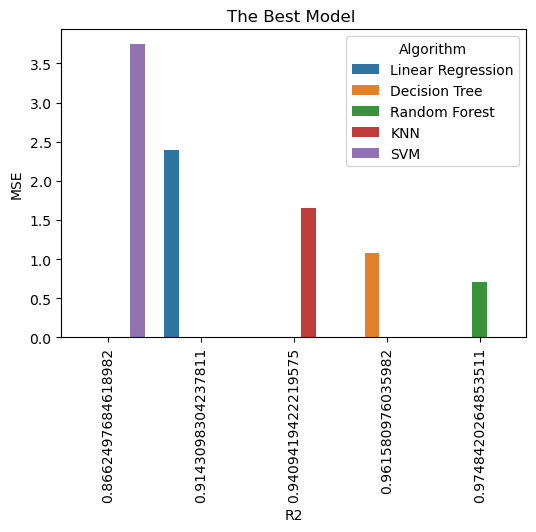

In [36]:
plt.figure(figsize=(6,4))
plt.title("The Best Model ")
sns.barplot(x="R2", y ="MSE", hue="Algorithm", data=df1)
plt.xticks(rotation=90)
plt.show()

> From the above plot we can observe Random Forest has least mean square error.

### Conclusion:

> From the above DataFrame we can observe that Random Forest has `MSE<R2`. It has the least error. So, the cost of advertising is less when we use this model and the sale is high.